# Dublin Aiport Climate Analysis

The data was obtained from Met Éireann's database. We have a csv file with daily data over the period of 01-jan-1942 until 31-jul-2024, and another csv file with monthly averages from the same period. Run the codes in the order they're provided to explore the data.

## Data Importing

In [1]:
import pandas as pd
from datetime import datetime

#importing the data into a Pandas data frame 
dublin_month = pd.read_csv('../Met Eirann Data/dublin_airport_month.csv', skiprows=19)
dublin_daily = pd.read_csv('../Met Eirann Data/dublin_airport_daily.csv', skiprows=25)

# Convert 'date' column to datetime
dublin_daily['date'] = pd.to_datetime(dublin_daily['date'], format='%d-%b-%Y')

# Extract year and month from 'date' column
dublin_daily['year'] = dublin_daily['date'].dt.year
dublin_daily['month'] = dublin_daily['date'].dt.month


We will be using Dash's interactive app library. Install dash to run the apps in the notebook

In [ ]:
pip install dash

## Overview of the data

### Month data overview

**Monthly data:**

```txt
Station Name: DUBLIN AIRPORT
Station Height: 71 M 
Latitude:53.428  ,Longitude: -6.241


year:  -  Year
month: -  Month
rain:  -  Precipitation Amount (mm)
meant: -  Mean Air Temperature (C)
maxtp: -  Maximum Air Temperature (C)	  
mintp: -  Minimum  Air Temperature (C)	
mnmax: -  Mean Maximum Temperature (C)
mnmin: -  Mean Minimum Temperature (C)
gmin:  -  Grass Minimum Temperature (C)
wdsp:  -  Mean Wind Speed (knot)
mxgt:  -  Highest Gust (knot)
sun:   -  Sunshine duration (hours)```

You can filter a particular year for the month data in the "filter data.." part of the app by typying the year within quotes such as "2020". Alternatively, you can use .loc[] directly on the notebook:

```python
dublin_month.loc[dublin_month['year'].between(year,year_plus_1)]
```

In [ ]:
#Get year 2023 example
dublin_month.loc[dublin_month['year'].between(2023,2024)]

In [3]:
#Table information
dublin_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    993 non-null    int64  
 1   month   993 non-null    int64  
 2   meant   993 non-null    float64
 3   maxtp   993 non-null    float64
 4   mintp   993 non-null    float64
 5   mnmax   993 non-null    float64
 6   mnmin   993 non-null    float64
 7   rain    993 non-null    float64
 8   gmin    993 non-null    object 
 9   wdsp    993 non-null    float64
 10  maxgt   993 non-null    object 
 11  sun     993 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 93.2+ KB


In [4]:
#Statistical description of the data
dublin_month[['maxtp', 'mintp', 'mnmin', 'mnmax', 'rain', 'sun', 'wdsp']].describe().round(2)

,maxtp,mintp,mnmin,mnmax,rain,sun,wdsp
count,993.00,993.00,993.00,993.00,993.00,993.00,993.00
mean,17.79,0.81,6.13,13.03,63.14,122.09,10.20
std,4.38,4.07,3.43,4.28,34.38,54.92,2.13
min,4.80,-12.20,-3.50,1.90,3.60,16.40,0.00
25%,13.90,-2.20,3.30,9.40,39.10,73.50,8.70
50%,17.40,0.30,5.50,12.70,56.90,119.00,10.00
75%,21.60,4.20,9.20,17.00,83.20,161.60,11.60
max,29.10,10.00,13.60,22.90,217.00,305.90,17.70


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>maxtp</th>
      <th>mintp</th>
      <th>mnmin</th>
      <th>mnmax</th>
      <th>rain</th>
      <th>sun</th>
      <th>wdsp</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>993.00</td>
      <td>993.00</td>
      <td>993.00</td>
      <td>993.00</td>
      <td>993.00</td>
      <td>993.00</td>
      <td>993.00</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>17.79</td>
      <td>0.81</td>
      <td>6.13</td>
      <td>13.03</td>
      <td>63.14</td>
      <td>122.09</td>
      <td>10.20</td>
    </tr>
    <tr>
      <th>std</th>
      <td>4.38</td>
      <td>4.07</td>
      <td>3.43</td>
      <td>4.28</td>
      <td>34.38</td>
      <td>54.92</td>
      <td>2.13</td>
    </tr>
    <tr>
      <th>min</th>
      <td>4.80</td>
      <td>-12.20</td>
      <td>-3.50</td>
      <td>1.90</td>
      <td>3.60</td>
      <td>16.40</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>13.90</td>
      <td>-2.20</td>
      <td>3.30</td>
      <td>9.40</td>
      <td>39.10</td>
      <td>73.50</td>
      <td>8.70</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>17.40</td>
      <td>0.30</td>
      <td>5.50</td>
      <td>12.70</td>
      <td>56.90</td>
      <td>119.00</td>
      <td>10.00</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>21.60</td>
      <td>4.20</td>
      <td>9.20</td>
      <td>17.00</td>
      <td>83.20</td>
      <td>161.60</td>
      <td>11.60</td>
    </tr>
    <tr>
      <th>max</th>
      <td>29.10</td>
      <td>10.00</td>
      <td>13.60</td>
      <td>22.90</td>
      <td>217.00</td>
      <td>305.90</td>
      <td>17.70</td>
    </tr>
  </tbody>
</table>
</div>

### Dash App month data

In [4]:
import dash
from dash import dash_table
import pandas as pd

# Create a Dash app

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = dash_table.DataTable(
    id='table',
    columns=[{'name': i, 'id': i} for i in dublin_month.columns],
    data=dublin_month.to_dict('records'),
    editable=True,
    filter_action='native',
    sort_action='native',
    sort_mode='multi',
    row_selectable='single',
    row_deletable=True,
    selected_rows=[],
    page_action='native',
    page_current=0,
    page_size=20, #chagne the number of results displayed
    style_table={'overflowY': 'scroll'}
)

# Run the app
app.run_server(mode='jupyterlab')

### Daily data overview

**Daily data:**

```txt
Station Name: DUBLIN AIRPORT
Station Height: 71 M 
Latitude:53.428  ,Longitude: -6.241


date:   -  00 to 00 utc
rain:   -  Precipitation Amount (mm)
maxtp:  -  Maximum Air Temperature (C)	  
mintp:  -  Minimum  Air Temperature (C)
gmin:   -  09utc Grass Minimum Temperature (C)
soil:   -  Mean 10cm Soil Temperature (C)
wdsp:   -  Mean Wind Speed (knot)
hm:     -  Highest ten minute mean wind speed (knot)		                 
ddhm:   -  Wind Direction at max 10 min. mean (deg)                  
hg:     -  Highest Gust (knot)
cbl:    -  Mean CBL Pressure (hpa)
sun:    -  Sunshine duration (hours)
g_rad:  -  Global Radiation (j/cm sq.)
pe:     -  Potential Evapotranspiration (mm)				
evap:   -  Evaporation (mm)						
smd_wd: -  Soil Moisture Deficits(mm) well drained		
smd_md: -  Soil Moisture Deficits(mm) moderately drained	
smd_pd: -  Soil Moisture Deficits(mm) poorly drained ```

We can drop a few columns in the daily data table since we don't need to look at all the categories.

In [5]:
dublin_daily = dublin_daily.drop(['gmin','ind','ind.1','ind.2','ind.3','ind.4','ind.5','igmin', 'dos', 'soil', 'hm','hg', 'ddhm', 'cbl', 'g_rad', 'pe', 'evap', 'smd_wd', 'smd_md', 'smd_pd'], axis=1)

In [6]:
dublin_daily

,date,maxtp,mintp,rain,wdsp,sun,year,month
0,1942-01-01,9.7,6.8,0.0,17.2,0.0,1942,1
1,1942-01-02,9.9,7.9,0.1,15.2,0.0,1942,1
2,1942-01-03,11.2,8.9,1.5,14.0,0.1,1942,1
3,1942-01-04,9.2,2.7,3.5,17.0,0.6,1942,1
4,1942-01-05,3.5,-0.8,0.6,13.0,3.4,1942,1
...,...,...,...,...,...,...,...,...
30158,2024-07-27,20.3,12.3,0.3,5.2,3.3,2024,7
30159,2024-07-28,21.9,10.9,0.0,6.5,9.8,2024,7
30160,2024-07-29,22.5,12.8,1.2,6.0,7.1,2024,7
30161,2024-07-30,20.6,9.9,0.0,5.9,11.1,2024,7


In [6]:
dublin_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30163 entries, 0 to 30162
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30163 non-null  datetime64[ns]
 1   maxtp   30163 non-null  float64       
 2   mintp   30163 non-null  float64       
 3   rain    30163 non-null  float64       
 4   wdsp    30163 non-null  float64       
 5   sun     30163 non-null  float64       
 6   year    30163 non-null  int32         
 7   month   30163 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 1.6 MB


In [7]:
#statistical description
dublin_daily[['maxtp', 'mintp', 'rain', 'wdsp', 'sun']].describe().round(2)

,maxtp,mintp,rain,wdsp,sun
count,30163.00,30163.00,30163.00,30163.00,30163.00
mean,13.06,6.15,2.07,10.19,4.02
std,4.91,4.38,4.39,4.60,3.76
min,-4.70,-12.20,0.00,0.00,0.00
25%,9.40,2.90,0.00,6.80,0.50
50%,13.00,6.30,0.20,9.50,3.20
75%,16.90,9.60,2.20,13.00,6.50
max,29.10,18.40,92.60,35.50,15.90


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>maxtp</th>
      <th>mintp</th>
      <th>rain</th>
      <th>wdsp</th>
      <th>sun</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>30163.00</td>
      <td>30163.00</td>
      <td>30163.00</td>
      <td>30163.00</td>
      <td>30163.00</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>13.06</td>
      <td>6.15</td>
      <td>2.07</td>
      <td>10.19</td>
      <td>4.02</td>
    </tr>
    <tr>
      <th>std</th>
      <td>4.91</td>
      <td>4.38</td>
      <td>4.39</td>
      <td>4.60</td>
      <td>3.76</td>
    </tr>
    <tr>
      <th>min</th>
      <td>-4.70</td>
      <td>-12.20</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>9.40</td>
      <td>2.90</td>
      <td>0.00</td>
      <td>6.80</td>
      <td>0.50</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>13.00</td>
      <td>6.30</td>
      <td>0.20</td>
      <td>9.50</td>
      <td>3.20</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>16.90</td>
      <td>9.60</td>
      <td>2.20</td>
      <td>13.00</td>
      <td>6.50</td>
    </tr>
    <tr>
      <th>max</th>
      <td>29.10</td>
      <td>18.40</td>
      <td>92.60</td>
      <td>35.50</td>
      <td>15.90</td>
    </tr>
  </tbody>
</table>
</div>

### Dash app daily data

In [8]:
import dash
from dash import dash_table

# Create a Dash app

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = dash_table.DataTable(
    id='table',
    columns=[{'name': i, 'id': i} for i in dublin_daily.columns],
    data=dublin_daily.to_dict('records'),
    editable=True,
    filter_action='native',
    sort_action='native',
    sort_mode='multi',
    row_selectable='single',
    row_deletable=True,
    selected_rows=[],
    page_action='native',
    page_current=0,
    page_size=20,  #change the number of results displayed
    style_table={'overflowY': 'scroll'}
)

# Run the app
app.run_server(mode='jupyterlab')

## Data Aggregation


### Month Year aggregation

In [9]:

# Group by year and month, and aggregate

grouped_daily_temperature = dublin_daily.groupby(['year', 'month'])[['maxtp', 'mintp']].agg(['median', 'mean', 'min', 'max', 'count'])
grouped_daily_rain = dublin_daily.groupby(['year', 'month'])['rain'].agg(['median', 'mean', 'sum', 'min', 'max', 'sum'])
grouped_daily_sun = dublin_daily.groupby(['year', 'month'])['sun'].agg(['median', 'mean','sum', 'min', 'max', 'count', 'sum' ])

In [10]:
#equivalent to the month table
grouped_daily_temperature

maxtp                               mintp                        \
           median       mean   min   max count median       mean  min   max   
year month                                                                    
1942 1       6.50   6.887097   3.5  11.9    31    1.1   1.683871 -3.1   8.9   
     2       5.70   5.803571   0.0  11.6    28   -0.7  -0.014286 -4.3   7.1   
     3       9.80   9.364516   0.9  16.2    31    4.4   3.196774 -6.1   6.3   
     4      12.20  11.913333   8.4  16.2    30    4.9   4.946667  0.8   9.1   
     5      14.90  14.448387   8.4  20.9    31    6.6   6.300000  1.8   9.0   
...           ...        ...   ...   ...   ...    ...        ...  ...   ...   
2024 3      10.30  10.493548   4.4  14.9    31    3.8   3.603226 -1.0   8.3   
     4      12.45  12.726667   8.5  16.8    30    4.6   4.316667 -1.5  12.5   
     5      16.90  16.909677  12.3  21.4    31    9.4   9.019355  5.6  11.1   
     6      17.70  17.840000  13.9  25.6    30    8.1   8.286667  3.6  16.0   
     7      19.40  19.051613  14.0  23.0    31   10.3  10.735484  6.7  14.6   

                  
           count  
year month        
1942 1        31  
     2        28  
     3        31  
     4        30  
     5        31  
...          ...  
2024 3        31  
     4        30  
     5        31  
     6        30  
     7        31  

[991 rows x 10 columns]

We can then use .resample() to aggregate the data in year intervals.

```python
# Group by N year intervals and aggregate
resampled_df = grouped_df.resample('NY', on='date')[['maxtp', 'mintp', 'rain']].agg(['median', 'min', 'max', 'count'])
```

### Aggregation by decade

In [11]:
# Temperature aggregated by decade
resampled_temperature = dublin_daily.resample('10YE', on='date')[['maxtp', 'mintp']].agg(['median', 'mean', 'min', 'max', 'count']).round(2)
resampled_temperature

maxtp                          mintp                        
           median   mean  min   max count median  mean   min   max count
date                                                                    
1942-12-31  12.60  12.68  0.0  24.1   365    5.6  5.63  -6.1  14.8   365
1952-12-31  12.90  12.87 -1.7  26.2  3653    6.2  6.01 -10.9  17.4  3653
1962-12-31  12.80  12.77 -1.7  25.9  3652    6.4  6.21 -10.1  18.2  3652
1972-12-31  12.70  12.54 -1.1  25.2  3653    6.5  6.29  -8.8  16.8  3653
1982-12-31  12.60  12.80 -2.5  26.4  3652    6.4  6.44  -8.1  16.8  3652
1992-12-31  12.90  13.15 -2.5  28.7  3653    6.6  6.57  -5.4  18.4  3653
2002-12-31  13.20  13.26 -1.6  27.1  3652    6.1  6.00  -7.9  17.6  3652
2012-12-31  13.40  13.41 -4.7  26.5  3653    6.1  5.85 -12.2  17.6  3653
2022-12-31  13.45  13.58 -0.5  29.1  3652    5.9  5.84  -7.9  18.2  3652
2032-12-31  13.60  13.98  2.0  26.1   578    6.9  6.66  -5.1  17.4   578

In [12]:
#overview of maximum temperatures over decade
resampled_temperature = dublin_daily.resample('10YE', on='date')[['maxtp', 'mintp']].agg(['median', 'mean', 'min', 'max', 'count']).round(2)
resampled_temperature['maxtp'][['median','mean']]

,median,mean
date,,
1942-12-31,12.60,12.68
1952-12-31,12.90,12.87
1962-12-31,12.80,12.77
1972-12-31,12.70,12.54
1982-12-31,12.60,12.80
1992-12-31,12.90,13.15
2002-12-31,13.20,13.26
2012-12-31,13.40,13.41
2022-12-31,13.45,13.58


### Season aggreagation

Let's now aggregate the data by seasons so we can study the variations by season: 

In [13]:
import pandas as pd
import numpy as np


# Create a new column 'season' based on the month
dublin_daily['season'] = np.where((dublin_daily['month'] >= 3) & (dublin_daily['month'] <= 5), 'Spring',
                         np.where((dublin_daily['month'] >= 6) & (dublin_daily['month'] <= 8), 'Summer',
                         np.where((dublin_daily['month'] >= 9) & (dublin_daily['month'] <= 11), 'Autumn', 'Winter')))

# Group by 'year' and 'season'
seasonal_data = dublin_daily.groupby(['year', 'season'])

# Now you can perform aggregation operations on the grouped data

In [14]:
#data aggregated by season
seasonal_data_tp = dublin_daily.groupby(['year', 'season'])[['maxtp', 'mintp']].agg(['median', 'mean', 'max', 'min'])
seasonal_data_rain = dublin_daily.groupby(['year', 'season'])['rain'].agg(['median', 'mean', 'max', 'min', 'sum'])
seasonal_data_sun = dublin_daily.groupby(['year', 'season'])['sun'].agg(['median', 'mean', 'max', 'min', 'sum'])


## Temperature Analysis

We begin by looking at the temperatures aggregated by year:

In [11]:
#temperature grouped by year
df = dublin_daily.groupby('year')[['maxtp', 'mintp']].agg(['median', 'mean', 'min', 'max'])
df.round(1)

maxtp                   mintp                
     median  mean  min   max median mean  min   max
year                                               
1942   12.6  12.7  0.0  24.1    5.6  5.6 -6.1  14.8
1943   13.2  13.2  2.9  24.5    6.4  6.2 -2.8  14.7
1944   12.9  13.1  2.1  24.2    5.6  5.8 -3.1  15.8
1945   14.1  13.6 -1.7  23.2    7.2  6.7 -7.7  15.6
1946   12.4  12.4  1.2  23.1    6.2  5.9 -6.8  15.8
...     ...   ...  ...   ...    ...  ...  ...   ...
2020   13.3  13.4  0.3  25.0    5.6  5.8 -4.4  15.9
2021   13.3  13.6  1.5  26.8    6.2  6.0 -5.9  15.8
2022   14.7  14.2  0.3  29.1    6.6  6.2 -4.4  16.9
2023   13.7  14.2  2.0  26.1    7.2  7.0 -4.8  17.4
2024   13.4  13.6  2.0  25.6    6.5  6.1 -5.1  16.0

[83 rows x 8 columns]

**Year averages/medians and extremes**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">maxtp</th>
      <th colspan="4" halign="left">mintp</th>
    </tr>
    <tr>
      <th></th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>year</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1942</th>
      <td>12.6</td>
      <td>12.7</td>
      <td>0.0</td>
      <td>24.1</td>
      <td>5.6</td>
      <td>5.6</td>
      <td>-6.1</td>
      <td>14.8</td>
    </tr>
    <tr>
      <th>1943</th>
      <td>13.2</td>
      <td>13.2</td>
      <td>2.9</td>
      <td>24.5</td>
      <td>6.4</td>
      <td>6.2</td>
      <td>-2.8</td>
      <td>14.7</td>
    </tr>
    <tr>
      <th>1944</th>
      <td>12.9</td>
      <td>13.1</td>
      <td>2.1</td>
      <td>24.2</td>
      <td>5.6</td>
      <td>5.8</td>
      <td>-3.1</td>
      <td>15.8</td>
    </tr>
    <tr>
      <th>1945</th>
      <td>14.1</td>
      <td>13.6</td>
      <td>-1.7</td>
      <td>23.2</td>
      <td>7.2</td>
      <td>6.7</td>
      <td>-7.7</td>
      <td>15.6</td>
    </tr>
    <tr>
      <th>1946</th>
      <td>12.4</td>
      <td>12.4</td>
      <td>1.2</td>
      <td>23.1</td>
      <td>6.2</td>
      <td>5.9</td>
      <td>-6.8</td>
      <td>15.8</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2020</th>
      <td>13.3</td>
      <td>13.4</td>
      <td>0.3</td>
      <td>25.0</td>
      <td>5.6</td>
      <td>5.8</td>
      <td>-4.4</td>
      <td>15.9</td>
    </tr>
    <tr>
      <th>2021</th>
      <td>13.3</td>
      <td>13.6</td>
      <td>1.5</td>
      <td>26.8</td>
      <td>6.2</td>
      <td>6.0</td>
      <td>-5.9</td>
      <td>15.8</td>
    </tr>
    <tr>
      <th>2022</th>
      <td>14.7</td>
      <td>14.2</td>
      <td>0.3</td>
      <td>29.1</td>
      <td>6.6</td>
      <td>6.2</td>
      <td>-4.4</td>
      <td>16.9</td>
    </tr>
    <tr>
      <th>2023</th>
      <td>13.7</td>
      <td>14.2</td>
      <td>2.0</td>
      <td>26.1</td>
      <td>7.2</td>
      <td>7.0</td>
      <td>-4.8</td>
      <td>17.4</td>
    </tr>
    <tr>
      <th>2024</th>
      <td>13.4</td>
      <td>13.6</td>
      <td>2.0</td>
      <td>25.6</td>
      <td>6.5</td>
      <td>6.1</td>
      <td>-5.1</td>
      <td>16.0</td>
    </tr>
  </tbody>
</table>
<p>83 rows × 8 columns</p>
</div>

Just by looking at the table we clearly see a warming trend in the past few years, with 2022 clearly being the warmest year ever recorded. To confirm that we sort the values to study the warmest years in descending order.

In [48]:
df.sort_values(('maxtp', 'median'),ascending=False).head(20).round(1)

maxtp                   mintp                 
     median  mean  min   max median mean   min   max
year                                                
2022   14.7  14.2  0.3  29.1    6.6  6.2  -4.4  16.9
2011   14.4  13.7  2.6  24.1    6.2  6.0  -6.8  15.1
2007   14.2  13.8  3.5  22.8    6.5  6.3  -4.8  14.9
1945   14.1  13.6 -1.7  23.2    7.2  6.7  -7.7  15.6
1990   14.0  13.9  2.5  28.7    7.4  7.1  -2.9  17.0
2014   13.9  13.8  3.8  24.1    5.7  6.1  -3.9  14.9
2015   13.9  13.4  2.7  24.7    5.4  5.3  -7.9  14.9
2006   13.8  14.0  3.7  26.5    6.4  6.4  -5.8  17.6
2017   13.7  13.7  2.8  26.3    6.8  6.2  -4.8  14.6
1995   13.7  13.9  1.2  27.1    6.1  5.9  -7.9  17.4
2023   13.7  14.2  2.0  26.1    7.2  7.0  -4.8  17.4
2003   13.5  13.8  2.6  25.7    6.1  5.9  -5.2  16.8
2001   13.5  13.2  0.5  26.9    5.5  5.5  -7.9  17.6
1997   13.5  13.6  0.9  24.1    6.3  6.1  -4.2  16.3
1999   13.5  13.5  2.6  25.6    6.6  6.2  -5.1  17.3
2002   13.4  13.5  5.3  23.7    6.3  6.3  -6.6  16.7
2005   13.4  13.6  3.8  24.8    6.5  6.4  -3.4  17.2
2024   13.4  13.6  2.0  25.6    6.5  6.1  -5.1  16.0
1948   13.4  13.1  1.4  25.9    6.1  6.3  -2.8  15.4
1961   13.3  13.1  0.6  22.1    6.8  6.5 -10.1  14.1

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">maxtp</th>
      <th colspan="4" halign="left">mintp</th>
    </tr>
    <tr>
      <th></th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>year</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2022</th>
      <td>14.7</td>
      <td>14.2</td>
      <td>0.3</td>
      <td>29.1</td>
      <td>6.6</td>
      <td>6.2</td>
      <td>-4.4</td>
      <td>16.9</td>
    </tr>
    <tr>
      <th>2011</th>
      <td>14.4</td>
      <td>13.7</td>
      <td>2.6</td>
      <td>24.1</td>
      <td>6.2</td>
      <td>6.0</td>
      <td>-6.8</td>
      <td>15.1</td>
    </tr>
    <tr>
      <th>2007</th>
      <td>14.2</td>
      <td>13.8</td>
      <td>3.5</td>
      <td>22.8</td>
      <td>6.5</td>
      <td>6.3</td>
      <td>-4.8</td>
      <td>14.9</td>
    </tr>
    <tr>
      <th>1945</th>
      <td>14.1</td>
      <td>13.6</td>
      <td>-1.7</td>
      <td>23.2</td>
      <td>7.2</td>
      <td>6.7</td>
      <td>-7.7</td>
      <td>15.6</td>
    </tr>
    <tr>
      <th>1990</th>
      <td>14.0</td>
      <td>13.9</td>
      <td>2.5</td>
      <td>28.7</td>
      <td>7.4</td>
      <td>7.1</td>
      <td>-2.9</td>
      <td>17.0</td>
    </tr>
    <tr>
      <th>2014</th>
      <td>13.9</td>
      <td>13.8</td>
      <td>3.8</td>
      <td>24.1</td>
      <td>5.7</td>
      <td>6.1</td>
      <td>-3.9</td>
      <td>14.9</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>13.9</td>
      <td>13.4</td>
      <td>2.7</td>
      <td>24.7</td>
      <td>5.4</td>
      <td>5.3</td>
      <td>-7.9</td>
      <td>14.9</td>
    </tr>
    <tr>
      <th>2006</th>
      <td>13.8</td>
      <td>14.0</td>
      <td>3.7</td>
      <td>26.5</td>
      <td>6.4</td>
      <td>6.4</td>
      <td>-5.8</td>
      <td>17.6</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>13.7</td>
      <td>13.7</td>
      <td>2.8</td>
      <td>26.3</td>
      <td>6.8</td>
      <td>6.2</td>
      <td>-4.8</td>
      <td>14.6</td>
    </tr>
    <tr>
      <th>1995</th>
      <td>13.7</td>
      <td>13.9</td>
      <td>1.2</td>
      <td>27.1</td>
      <td>6.1</td>
      <td>5.9</td>
      <td>-7.9</td>
      <td>17.4</td>
    </tr>
    <tr>
      <th>2023</th>
      <td>13.7</td>
      <td>14.2</td>
      <td>2.0</td>
      <td>26.1</td>
      <td>7.2</td>
      <td>7.0</td>
      <td>-4.8</td>
      <td>17.4</td>
    </tr>
    <tr>
      <th>2003</th>
      <td>13.5</td>
      <td>13.8</td>
      <td>2.6</td>
      <td>25.7</td>
      <td>6.1</td>
      <td>5.9</td>
      <td>-5.2</td>
      <td>16.8</td>
    </tr>
    <tr>
      <th>2001</th>
      <td>13.5</td>
      <td>13.2</td>
      <td>0.5</td>
      <td>26.9</td>
      <td>5.5</td>
      <td>5.5</td>
      <td>-7.9</td>
      <td>17.6</td>
    </tr>
    <tr>
      <th>1997</th>
      <td>13.5</td>
      <td>13.6</td>
      <td>0.9</td>
      <td>24.1</td>
      <td>6.3</td>
      <td>6.1</td>
      <td>-4.2</td>
      <td>16.3</td>
    </tr>
    <tr>
      <th>1999</th>
      <td>13.5</td>
      <td>13.5</td>
      <td>2.6</td>
      <td>25.6</td>
      <td>6.6</td>
      <td>6.2</td>
      <td>-5.1</td>
      <td>17.3</td>
    </tr>
    <tr>
      <th>2002</th>
      <td>13.4</td>
      <td>13.5</td>
      <td>5.3</td>
      <td>23.7</td>
      <td>6.3</td>
      <td>6.3</td>
      <td>-6.6</td>
      <td>16.7</td>
    </tr>
    <tr>
      <th>2005</th>
      <td>13.4</td>
      <td>13.6</td>
      <td>3.8</td>
      <td>24.8</td>
      <td>6.5</td>
      <td>6.4</td>
      <td>-3.4</td>
      <td>17.2</td>
    </tr>
    <tr>
      <th>2024</th>
      <td>13.4</td>
      <td>13.6</td>
      <td>2.0</td>
      <td>25.6</td>
      <td>6.5</td>
      <td>6.1</td>
      <td>-5.1</td>
      <td>16.0</td>
    </tr>
    <tr>
      <th>1948</th>
      <td>13.4</td>
      <td>13.1</td>
      <td>1.4</td>
      <td>25.9</td>
      <td>6.1</td>
      <td>6.3</td>
      <td>-2.8</td>
      <td>15.4</td>
    </tr>
    <tr>
      <th>1961</th>
      <td>13.3</td>
      <td>13.1</td>
      <td>0.6</td>
      <td>22.1</td>
      <td>6.8</td>
      <td>6.5</td>
      <td>-10.1</td>
      <td>14.1</td>
    </tr>
  </tbody>
</table>
</div>

### 2022

to find a particular year use .loc[] as:
```python
grouped_df.loc[(year,), :]
```

In [7]:
#Warmest year: 2022
grouped_daily_temperature.loc[(2022,), :].round(1)

maxtp                          mintp                       
      median  mean   min   max count median  mean  min   max count
month                                                             
1        8.7   8.7   3.8  14.8    31    2.1   2.2 -4.0   9.7    31
2       10.0   9.7   6.4  13.5    28    3.2   3.7 -1.1   8.5    28
3       11.4  11.5   6.4  17.6    31    1.6   1.8 -4.4   6.4    31
4       12.4  12.5   8.5  17.3    30    3.2   2.7 -3.7   8.7    30
5       16.3  16.3  12.8  19.9    31    8.3   7.6  2.3  11.6    31
6       18.0  17.7  11.5  22.6    30   10.2   9.5  2.3  13.8    30
7       20.4  21.0  16.6  29.1    31   11.0  11.7  6.6  15.4    31
8       20.7  21.3  17.7  26.3    31   10.3  10.5  6.0  16.9    31
9       17.4  17.2  12.5  20.1    30    8.6   8.8  3.1  14.0    30
10      15.8  15.6  13.1  18.0    31    8.9   8.4  1.3  14.2    31
11      11.6  11.7   6.2  16.5    30    6.4   6.0 -0.8  13.0    30
12       8.3   7.3   0.3  14.7    31    1.7   1.6 -4.2   7.1    31

**2022**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="5" halign="left">maxtp</th>
      <th colspan="5" halign="left">mintp</th>
    </tr>
    <tr>
      <th></th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>count</th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>count</th>
    </tr>
    <tr>
      <th>month</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>8.7</td>
      <td>8.7</td>
      <td>3.8</td>
      <td>14.8</td>
      <td>31</td>
      <td>2.1</td>
      <td>2.2</td>
      <td>-4.0</td>
      <td>9.7</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2</th>
      <td>10.0</td>
      <td>9.7</td>
      <td>6.4</td>
      <td>13.5</td>
      <td>28</td>
      <td>3.2</td>
      <td>3.7</td>
      <td>-1.1</td>
      <td>8.5</td>
      <td>28</td>
    </tr>
    <tr>
      <th>3</th>
      <td>11.4</td>
      <td>11.5</td>
      <td>6.4</td>
      <td>17.6</td>
      <td>31</td>
      <td>1.6</td>
      <td>1.8</td>
      <td>-4.4</td>
      <td>6.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>4</th>
      <td>12.4</td>
      <td>12.5</td>
      <td>8.5</td>
      <td>17.3</td>
      <td>30</td>
      <td>3.2</td>
      <td>2.7</td>
      <td>-3.7</td>
      <td>8.7</td>
      <td>30</td>
    </tr>
    <tr>
      <th>5</th>
      <td>16.3</td>
      <td>16.3</td>
      <td>12.8</td>
      <td>19.9</td>
      <td>31</td>
      <td>8.3</td>
      <td>7.6</td>
      <td>2.3</td>
      <td>11.6</td>
      <td>31</td>
    </tr>
    <tr>
      <th>6</th>
      <td>18.0</td>
      <td>17.7</td>
      <td>11.5</td>
      <td>22.6</td>
      <td>30</td>
      <td>10.2</td>
      <td>9.5</td>
      <td>2.3</td>
      <td>13.8</td>
      <td>30</td>
    </tr>
    <tr>
      <th>7</th>
      <td>20.4</td>
      <td>21.0</td>
      <td>16.6</td>
      <td>29.1</td>
      <td>31</td>
      <td>11.0</td>
      <td>11.7</td>
      <td>6.6</td>
      <td>15.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>8</th>
      <td>20.7</td>
      <td>21.3</td>
      <td>17.7</td>
      <td>26.3</td>
      <td>31</td>
      <td>10.3</td>
      <td>10.5</td>
      <td>6.0</td>
      <td>16.9</td>
      <td>31</td>
    </tr>
    <tr>
      <th>9</th>
      <td>17.4</td>
      <td>17.2</td>
      <td>12.5</td>
      <td>20.1</td>
      <td>30</td>
      <td>8.6</td>
      <td>8.8</td>
      <td>3.1</td>
      <td>14.0</td>
      <td>30</td>
    </tr>
    <tr>
      <th>10</th>
      <td>15.8</td>
      <td>15.6</td>
      <td>13.1</td>
      <td>18.0</td>
      <td>31</td>
      <td>8.9</td>
      <td>8.4</td>
      <td>1.3</td>
      <td>14.2</td>
      <td>31</td>
    </tr>
    <tr>
      <th>11</th>
      <td>11.6</td>
      <td>11.7</td>
      <td>6.2</td>
      <td>16.5</td>
      <td>30</td>
      <td>6.4</td>
      <td>6.0</td>
      <td>-0.8</td>
      <td>13.0</td>
      <td>30</td>
    </tr>
    <tr>
      <th>12</th>
      <td>8.3</td>
      <td>7.3</td>
      <td>0.3</td>
      <td>14.7</td>
      <td>31</td>
      <td>1.7</td>
      <td>1.6</td>
      <td>-4.2</td>
      <td>7.1</td>
      <td>31</td>
    </tr>
  </tbody>
</table>
</div>

2022 was the warmest year recorded so far. That year also broke the record for the highest temperature ever recorded in Ireland, of 29.1C. That summer in particular saw records being broken all over Europe such as in the neighbouring island of Great Britain, where England saw a temperature over 41C for the first time in recorded history.

### 20 Warmest months

In [12]:
# Sort by median temperature in descending order
sorted_temperature = grouped_daily_temperature.sort_values(('maxtp', 'median'), ascending=False)
sorted_temperature.head(20).round(1)

maxtp                          mintp                       
           median  mean   min   max count median  mean  min   max count
year month                                                             
1995 8       23.7  22.9  18.3  27.1    31   12.3  11.8  6.8  16.3    31
1989 7       22.7  22.4  15.9  27.5    31   13.1  13.0  8.9  17.5    31
2006 7       22.6  22.0  16.0  26.5    31   12.0  11.8  5.4  17.6    31
1983 7       21.8  21.7  16.9  27.6    31   13.7  13.6  9.5  18.4    31
2013 7       21.7  21.9  17.4  26.2    31   11.5  11.6  8.5  15.5    31
2018 7       21.1  21.6  16.4  26.7    31   10.4  10.5  5.2  15.5    31
1995 7       21.0  20.9  16.0  26.8    31   11.4  11.6  7.1  17.4    31
1983 8       20.8  20.7  15.4  26.8    31   13.9  13.1  8.1  16.5    31
2022 8       20.7  21.3  17.7  26.3    31   10.3  10.5  6.0  16.9    31
1975 7       20.6  20.0  16.4  23.6    31   13.0  12.8  9.0  16.4    31
1955 7       20.6  20.5  14.2  25.9    31   12.1  11.7  6.9  16.4    31
2014 7       20.5  20.6  17.5  24.1    31   11.7  11.1  5.1  14.8    31
2003 8       20.5  20.6  15.7  25.7    31   11.0  11.0  6.0  16.8    31
2022 7       20.4  21.0  16.6  29.1    31   11.0  11.7  6.6  15.4    31
1984 7       20.4  20.7  17.5  26.0    31   11.5  11.6  7.5  14.7    31
1955 8       20.4  20.8  16.7  24.7    31   12.3  12.7  8.9  16.4    31
1947 8       20.4  20.3  15.7  24.0    31   12.1  12.2  8.5  14.5    31
1975 8       20.3  20.2  13.3  26.4    31   13.1  12.4  6.2  16.6    31
2003 7       20.3  20.0  15.3  23.9    31   12.2  12.3  9.2  15.1    31
2019 7       20.1  20.4  16.8  24.9    31   12.2  11.4  4.4  17.8    31

**20 warmest months (by max temp)**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="5" halign="left">maxtp</th>
      <th colspan="5" halign="left">mintp</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>count</th>
      <th>median</th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>count</th>
    </tr>
    <tr>
      <th>year</th>
      <th>month</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1995</th>
      <th>8</th>
      <td>23.7</td>
      <td>22.9</td>
      <td>18.3</td>
      <td>27.1</td>
      <td>31</td>
      <td>12.3</td>
      <td>11.8</td>
      <td>6.8</td>
      <td>16.3</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1989</th>
      <th>7</th>
      <td>22.7</td>
      <td>22.4</td>
      <td>15.9</td>
      <td>27.5</td>
      <td>31</td>
      <td>13.1</td>
      <td>13.0</td>
      <td>8.9</td>
      <td>17.5</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2006</th>
      <th>7</th>
      <td>22.6</td>
      <td>22.0</td>
      <td>16.0</td>
      <td>26.5</td>
      <td>31</td>
      <td>12.0</td>
      <td>11.8</td>
      <td>5.4</td>
      <td>17.6</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1983</th>
      <th>7</th>
      <td>21.8</td>
      <td>21.7</td>
      <td>16.9</td>
      <td>27.6</td>
      <td>31</td>
      <td>13.7</td>
      <td>13.6</td>
      <td>9.5</td>
      <td>18.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2013</th>
      <th>7</th>
      <td>21.7</td>
      <td>21.9</td>
      <td>17.4</td>
      <td>26.2</td>
      <td>31</td>
      <td>11.5</td>
      <td>11.6</td>
      <td>8.5</td>
      <td>15.5</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2018</th>
      <th>7</th>
      <td>21.1</td>
      <td>21.6</td>
      <td>16.4</td>
      <td>26.7</td>
      <td>31</td>
      <td>10.4</td>
      <td>10.5</td>
      <td>5.2</td>
      <td>15.5</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1995</th>
      <th>7</th>
      <td>21.0</td>
      <td>20.9</td>
      <td>16.0</td>
      <td>26.8</td>
      <td>31</td>
      <td>11.4</td>
      <td>11.6</td>
      <td>7.1</td>
      <td>17.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1983</th>
      <th>8</th>
      <td>20.8</td>
      <td>20.7</td>
      <td>15.4</td>
      <td>26.8</td>
      <td>31</td>
      <td>13.9</td>
      <td>13.1</td>
      <td>8.1</td>
      <td>16.5</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2022</th>
      <th>8</th>
      <td>20.7</td>
      <td>21.3</td>
      <td>17.7</td>
      <td>26.3</td>
      <td>31</td>
      <td>10.3</td>
      <td>10.5</td>
      <td>6.0</td>
      <td>16.9</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1975</th>
      <th>7</th>
      <td>20.6</td>
      <td>20.0</td>
      <td>16.4</td>
      <td>23.6</td>
      <td>31</td>
      <td>13.0</td>
      <td>12.8</td>
      <td>9.0</td>
      <td>16.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1955</th>
      <th>7</th>
      <td>20.6</td>
      <td>20.5</td>
      <td>14.2</td>
      <td>25.9</td>
      <td>31</td>
      <td>12.1</td>
      <td>11.7</td>
      <td>6.9</td>
      <td>16.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2014</th>
      <th>7</th>
      <td>20.5</td>
      <td>20.6</td>
      <td>17.5</td>
      <td>24.1</td>
      <td>31</td>
      <td>11.7</td>
      <td>11.1</td>
      <td>5.1</td>
      <td>14.8</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2003</th>
      <th>8</th>
      <td>20.5</td>
      <td>20.6</td>
      <td>15.7</td>
      <td>25.7</td>
      <td>31</td>
      <td>11.0</td>
      <td>11.0</td>
      <td>6.0</td>
      <td>16.8</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2022</th>
      <th>7</th>
      <td>20.4</td>
      <td>21.0</td>
      <td>16.6</td>
      <td>29.1</td>
      <td>31</td>
      <td>11.0</td>
      <td>11.7</td>
      <td>6.6</td>
      <td>15.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1984</th>
      <th>7</th>
      <td>20.4</td>
      <td>20.7</td>
      <td>17.5</td>
      <td>26.0</td>
      <td>31</td>
      <td>11.5</td>
      <td>11.6</td>
      <td>7.5</td>
      <td>14.7</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1955</th>
      <th>8</th>
      <td>20.4</td>
      <td>20.8</td>
      <td>16.7</td>
      <td>24.7</td>
      <td>31</td>
      <td>12.3</td>
      <td>12.7</td>
      <td>8.9</td>
      <td>16.4</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1947</th>
      <th>8</th>
      <td>20.4</td>
      <td>20.3</td>
      <td>15.7</td>
      <td>24.0</td>
      <td>31</td>
      <td>12.1</td>
      <td>12.2</td>
      <td>8.5</td>
      <td>14.5</td>
      <td>31</td>
    </tr>
    <tr>
      <th>1975</th>
      <th>8</th>
      <td>20.3</td>
      <td>20.2</td>
      <td>13.3</td>
      <td>26.4</td>
      <td>31</td>
      <td>13.1</td>
      <td>12.4</td>
      <td>6.2</td>
      <td>16.6</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2003</th>
      <th>7</th>
      <td>20.3</td>
      <td>20.0</td>
      <td>15.3</td>
      <td>23.9</td>
      <td>31</td>
      <td>12.2</td>
      <td>12.3</td>
      <td>9.2</td>
      <td>15.1</td>
      <td>31</td>
    </tr>
    <tr>
      <th>2019</th>
      <th>7</th>
      <td>20.1</td>
      <td>20.4</td>
      <td>16.8</td>
      <td>24.9</td>
      <td>31</td>
      <td>12.2</td>
      <td>11.4</td>
      <td>4.4</td>
      <td>17.8</td>
      <td>31</td>
    </tr>
  </tbody>
</table>
</div>

August 1995 was the warmest month ever recorded. From the 20 warmest months ever recorded, only 5 happened before 1980. 1995 was a particularly warm year most likely due to a quick warming recorded in the Atlantic ocean as discussed in the article: "https://journals.ametsoc.org/view/journals/clim/25/12/jcli-d-11-00443.1.xml"

We see that despite being the warmest year, 2022 did not record the warmest month (although august and july still made it to the top 20). That is an important observation of the variability and complexity of weather patterns. However, despite the seemingly random weather fluctuations, the upward overall trend is clearly apparent, specially when plotted, which we will do next. 

### Temperature by season


In [59]:
seasonal_data_tp

maxtp                         mintp                      
            median       mean   max   min median       mean   max  min
year season                                                           
1942 Autumn  12.80  12.554945  21.1   4.3   5.20   5.479121  12.8 -2.9
     Spring  11.95  11.908696  20.9   0.9   4.95   4.813043   9.1 -6.1
     Summer  18.35  18.434783  24.1  12.6  10.45  10.022826  14.8  1.4
     Winter   7.60   7.722222  13.6   0.0   1.80   2.115556   9.1 -4.3
1943 Autumn  13.70  13.167033  20.0   3.8   6.60   6.446154  14.2 -1.4
...            ...        ...   ...   ...    ...        ...   ...  ...
2023 Summer  18.80  19.181522  24.6  14.5  11.20  11.219565  17.4  3.5
     Winter   9.90   9.563333  14.2   2.0   4.85   4.246667  10.0 -4.8
2024 Spring  13.15  13.383696  21.4   4.4   6.30   5.660870  12.5 -1.5
     Summer  18.20  18.455738  25.6  13.9   9.70   9.531148  16.0  3.6
     Winter   8.85   9.016667  14.4   2.0   3.20   3.231667   9.5 -5.1

[331 rows x 8 columns]

# Visualisations

## Temperatures

### Rise of average Maximum temperatures over the decades

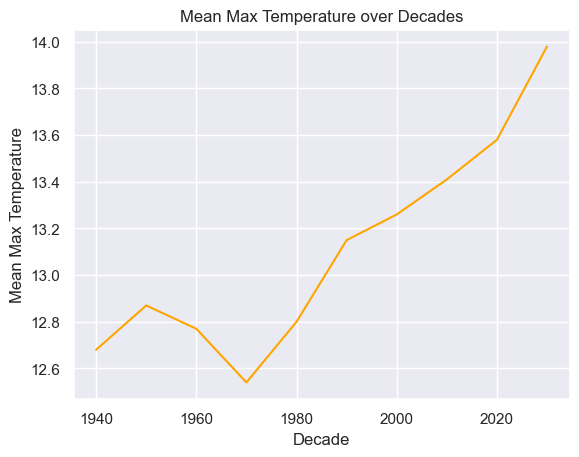

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=resampled_temperature.index.year // 10 * 10, 
             y=resampled_temperature['maxtp']['mean'], color='orange')
plt.title('Mean Max Temperature over Decades')
plt.xlabel('Decade')
plt.ylabel('Mean Max Temperature')
plt.show()

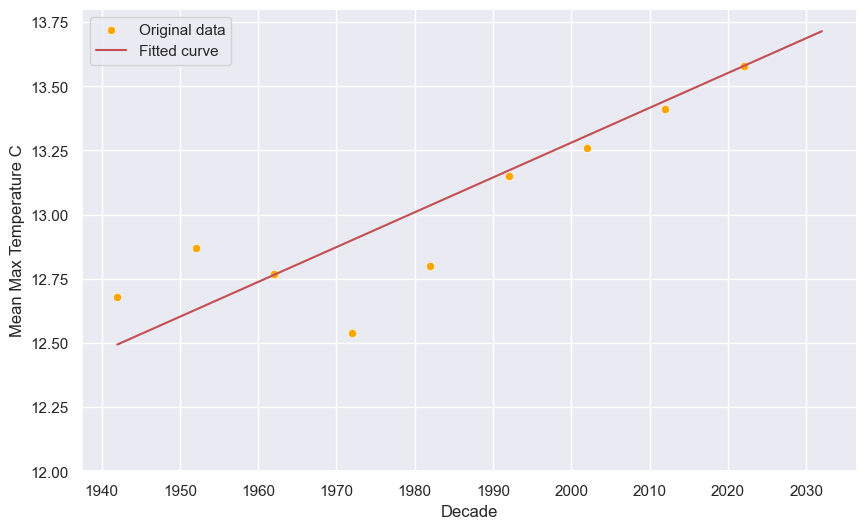

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Get the x and y values
x = resampled_temperature.index.year
y = resampled_temperature['maxtp']['mean']

# Fit the curve
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

# Plot the data with the fitted curve
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Original data', color='orange')
plt.plot(x, func(x, *popt), 'r-', label='Fitted curve')
plt.ylim([12, 13.8])
plt.legend()
plt.xlabel('Decade')
plt.ylabel('Mean Max Temperature C')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

When considering the averages of maximum temperatures we see a clear linear trend upward from the 1970's onward with a warming of at least 1C since then. 

### Median Minimum temperatures

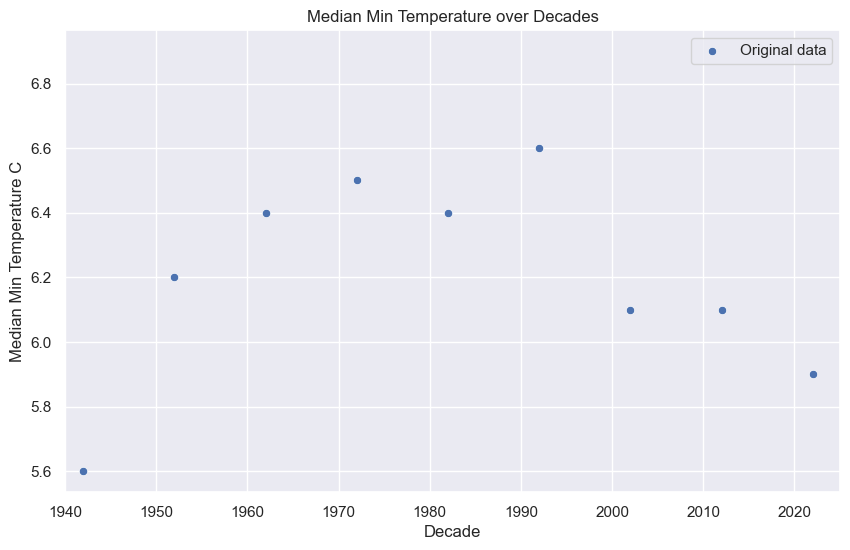

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the x and y values
x = resampled_temperature.index.year
y = resampled_temperature['mintp']['median']

plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Original data')
plt.xlim(1940, 2025)
plt.title('Median Min Temperature over Decades')
plt.xlabel('Decade')
plt.ylabel('Median Min Temperature C')
plt.show()

The situation with the median minimal temperatures is more complex. We notice a steady rise until the 1990s, but then a sudden dip in the recent decades. We could potentially assume this to be caused by the more erratic Polar Vortex patterns we have been witnessing in recent decades which causes powerful winter storms. That could explain why we have been seeing a simultaneous increase in maximum temperatures and a decrease in minimum temperatures (i.e. an increase in both extremes). This is a phenomenon similar to that being witnessed all over the northern hemisphere. 

### Yearly extremes over the decades

In [68]:
#temperature grouped by year
df = dublin_daily.groupby('year')[['maxtp', 'mintp']].agg(['median', 'mean', 'min', 'max'])
df.round(1)

maxtp                   mintp                
     median  mean  min   max median mean  min   max
year                                               
1942   12.6  12.7  0.0  24.1    5.6  5.6 -6.1  14.8
1943   13.2  13.2  2.9  24.5    6.4  6.2 -2.8  14.7
1944   12.9  13.1  2.1  24.2    5.6  5.8 -3.1  15.8
1945   14.1  13.6 -1.7  23.2    7.2  6.7 -7.7  15.6
1946   12.4  12.4  1.2  23.1    6.2  5.9 -6.8  15.8
...     ...   ...  ...   ...    ...  ...  ...   ...
2020   13.3  13.4  0.3  25.0    5.6  5.8 -4.4  15.9
2021   13.3  13.6  1.5  26.8    6.2  6.0 -5.9  15.8
2022   14.7  14.2  0.3  29.1    6.6  6.2 -4.4  16.9
2023   13.7  14.2  2.0  26.1    7.2  7.0 -4.8  17.4
2024   13.4  13.6  2.0  25.6    6.5  6.1 -5.1  16.0

[83 rows x 8 columns]

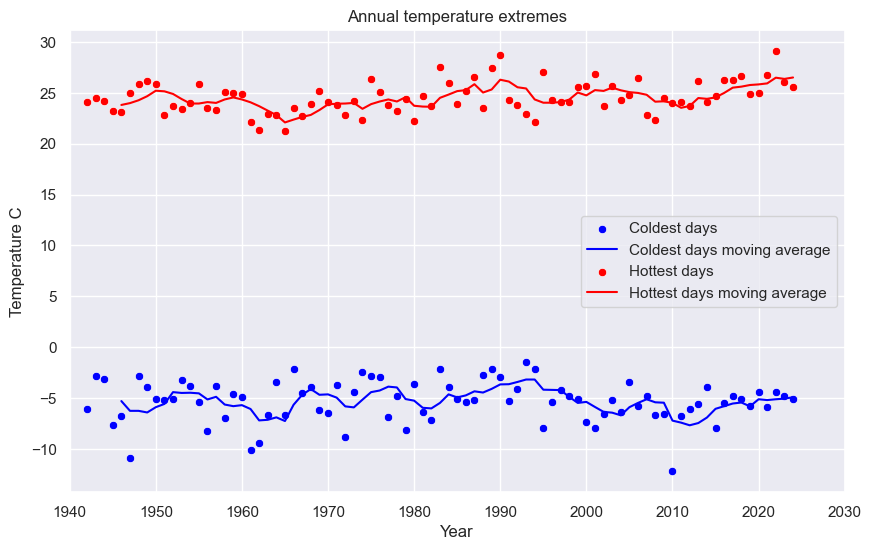

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
y = df['mintp']['min']
z = df['maxtp']['max']

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extremes_high_ma = z.rolling(window_size).mean()
extremes_low_ma = y.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Coldest days', color='blue')
sns.lineplot(x=x, y=extremes_low_ma, label='Coldest days moving average', color='blue')
sns.scatterplot(x=x, y=z, label='Hottest days', color='red')
sns.lineplot(x=x, y=extremes_high_ma, label='Hottest days moving average', color='red')
plt.xlim(1940, 2030)
plt.title('Annual temperature extremes')
plt.xlabel('Year')
plt.ylabel('Temperature C')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

On a larger scale, the trends aren't at all obvious, so we're gonna focus on the highs and lows separately next.

**Extreme highs**

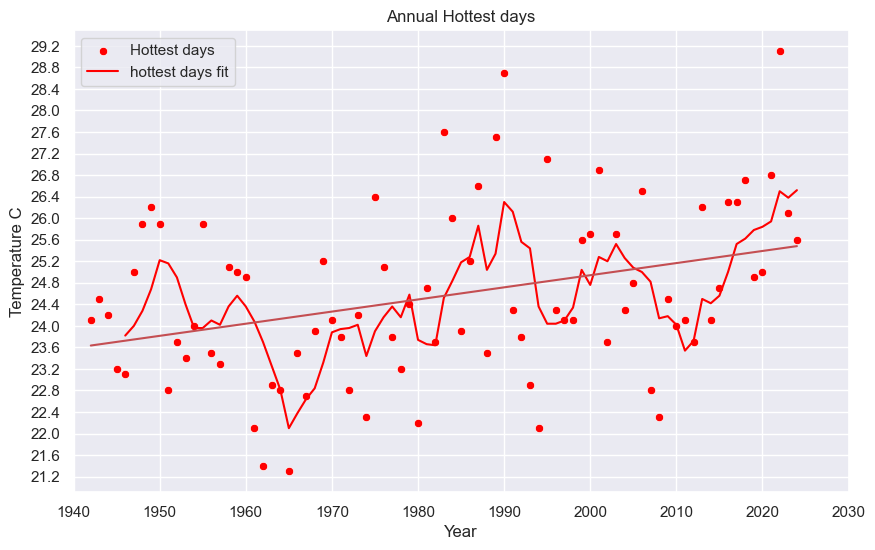

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
z = df['maxtp']['max']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d


# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, z)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extremes_high_ma = z.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=z, label='Hottest days', color='red')
sns.lineplot(x=x, y=extremes_high_ma, label='hottest days fit', color='red')
plt.plot(x, func(x, *popt), 'r-', label='Fitted curve')
plt.xlim(1940, 2030)
plt.title('Annual Hottest days')
plt.xlabel('Year')
plt.ylabel('Temperature C')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.4))
plt.show()

There is a clear upward trend in the temperature of the hottest day recorded each year. The average hottest day temperature has increased 2C since 1942. 

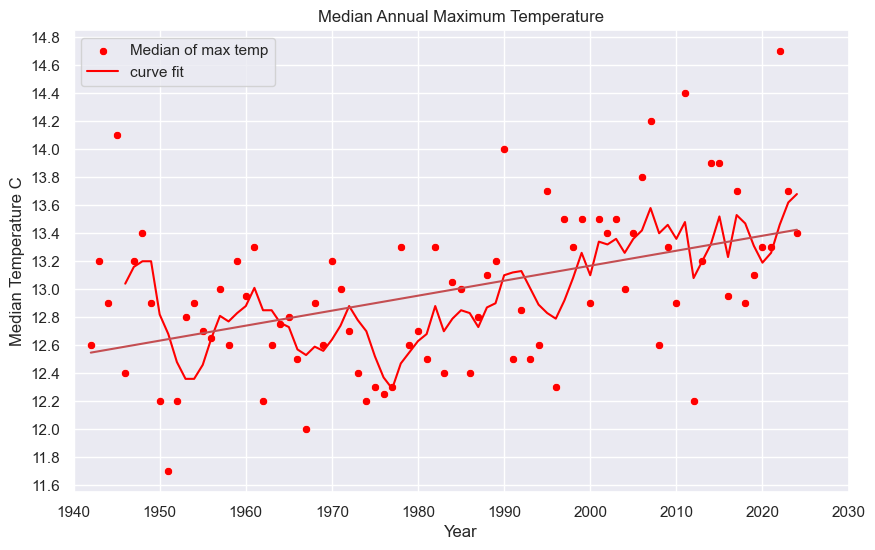

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
z = df['maxtp']['median']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d


# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, z)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extremes_high_ma = z.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=z, label='Median of max temp', color='red')
sns.lineplot(x=x, y=extremes_high_ma, label='curve fit', color='red')
plt.plot(x, func(x, *popt), 'r-', label='Fitted curve')
plt.xlim(1940, 2030)
plt.title('Median Annual Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Median Temperature C')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.show()

The increase in temperatures also extends to the annual medians as well, in this case by almost 1C. Therefore, days have been getting warmer year around, not only on the most extreme days. 

**Extreme lows**

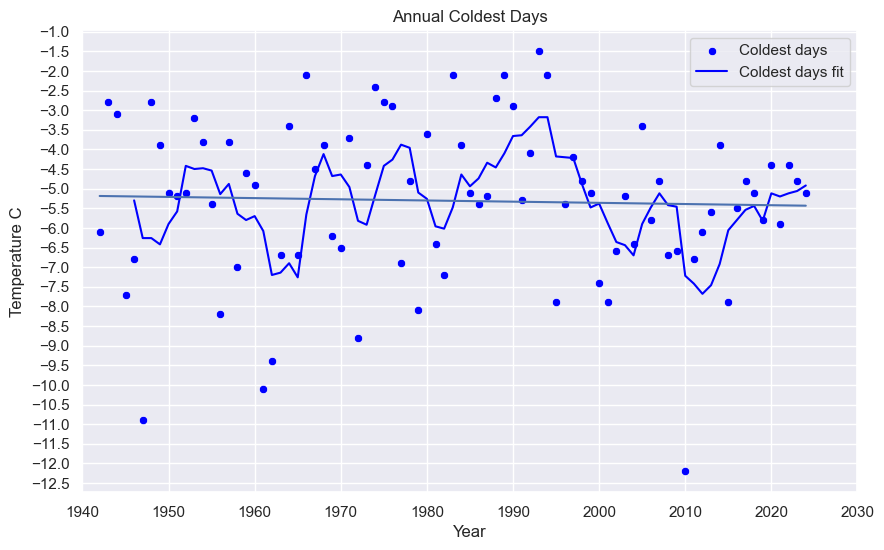

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
y = df['mintp']['min']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extremes_low_ma = y.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Coldest days', color='blue')
sns.lineplot(x=x, y=extremes_low_ma, label='Coldest days fit', color='blue')
plt.plot(x, func(x, *popt), 'b-', label='Fitted curve')
plt.xlim(1940, 2030)
plt.title('Annual Coldest Days')
plt.xlabel('Year')
plt.ylabel('Temperature C')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.show()

Surprisingly, the average cold day has been getting slightly colder over recent decades.

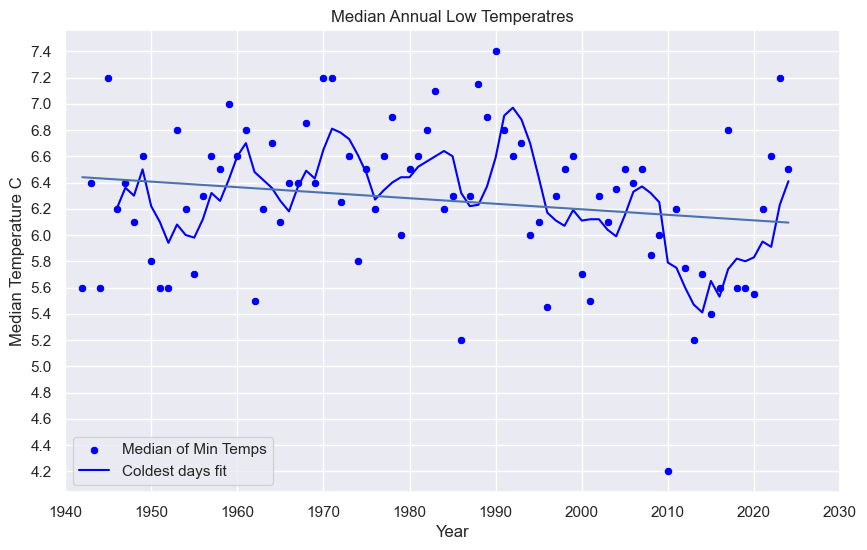

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
y = df['mintp']['median']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extremes_low_ma = y.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Median of Min Temps', color='blue')
sns.lineplot(x=x, y=extremes_low_ma, label='Coldest days fit', color='blue')
plt.plot(x, func(x, *popt), 'b-', label='Fitted curve')
plt.xlim(1940, 2030)
plt.title('Median Annual Low Temperatres')
plt.xlabel('Year')
plt.ylabel('Median Temperature C')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.show()

The median of the lows are, remarkably, trending down. That means that Dublin is noticing an increase in BOTH extremes, does that imply that Dublin is also cooling down however? Let's break down temperatures by season and see.

### Temperatures by Season

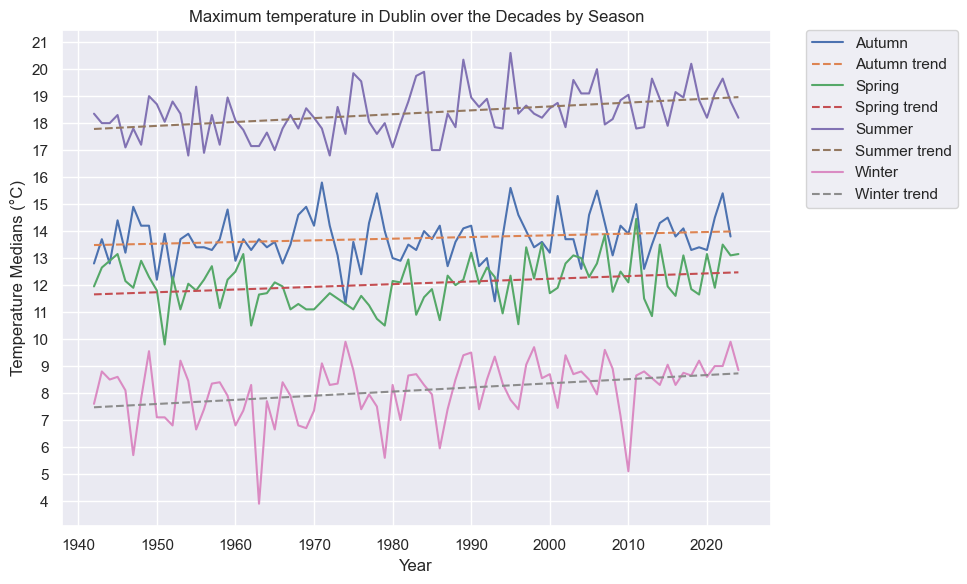

In [81]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for each season over the decades
plt.figure(figsize=(10, 6))
for season in seasonal_data_tp.index.get_level_values(1).unique():
    season_data = seasonal_data_tp.xs(season, level=1)
    plt.plot(season_data.index, season_data['maxtp']['median'], label=season)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['maxtp']['median'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend')

plt.xlabel('Year')
plt.ylabel('Temperature Medians (°C)')
plt.title('Maximum temperature in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

When breaking down the data by seasons the trends get more evident. We do notice a warming trend on all four seasons, with both winter and summer high temperatures increasing more quickly than autumn and spring. Summers have warmed by more than 1C, and winters are not trailing too far behind, having warmed about 1C. 

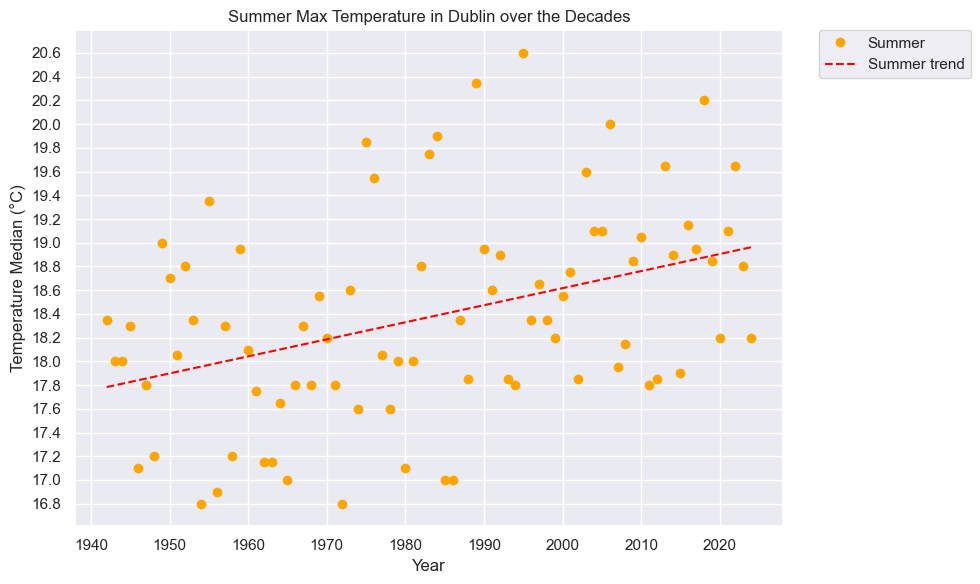

In [84]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for summer over the decades
summer_data = seasonal_data_tp.xs('Summer', level=1)
plt.figure(figsize=(10, 6))
plt.plot(summer_data.index, summer_data['maxtp']['median'], 'o', label='Summer', color='orange')

# Fit a linear regression line
x = np.array(summer_data.index)
y = np.array(summer_data['maxtp']['median'])
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, '--', label='Summer trend', color='red')

plt.xlabel('Year')
plt.ylabel('Temperature Median (°C)')
plt.title('Summer Max Temperature in Dublin over the Decades')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

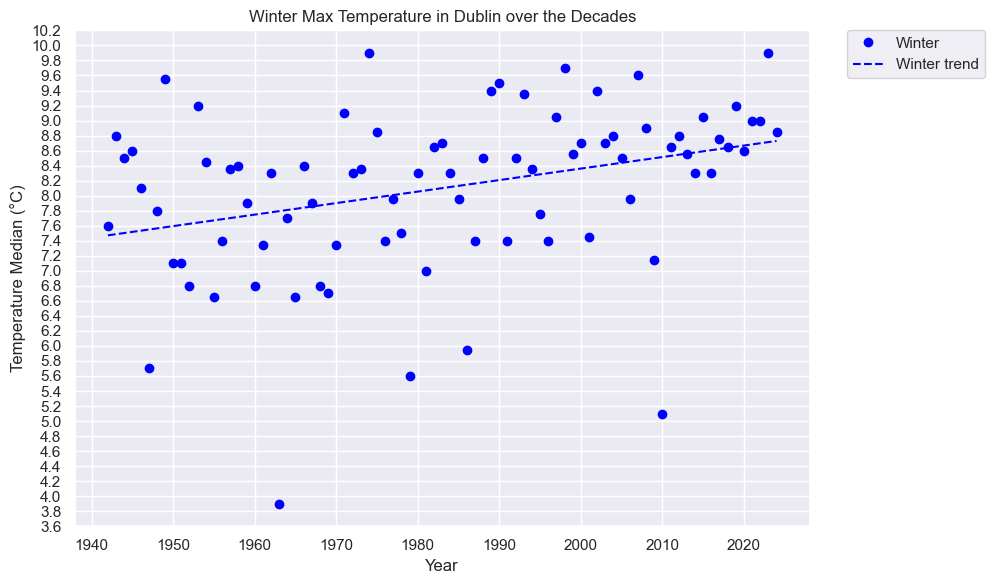

In [85]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for summer over the decades
summer_data = seasonal_data_tp.xs('Winter', level=1)
plt.figure(figsize=(10, 6))
plt.plot(summer_data.index, summer_data['maxtp']['median'], 'o', label='Winter', color='blue')

# Fit a linear regression line
x = np.array(summer_data.index)
y = np.array(summer_data['maxtp']['median'])
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, '--', label='Winter trend', color='blue')

plt.xlabel('Year')
plt.ylabel('Temperature Median (°C)')
plt.title('Winter Max Temperature in Dublin over the Decades')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

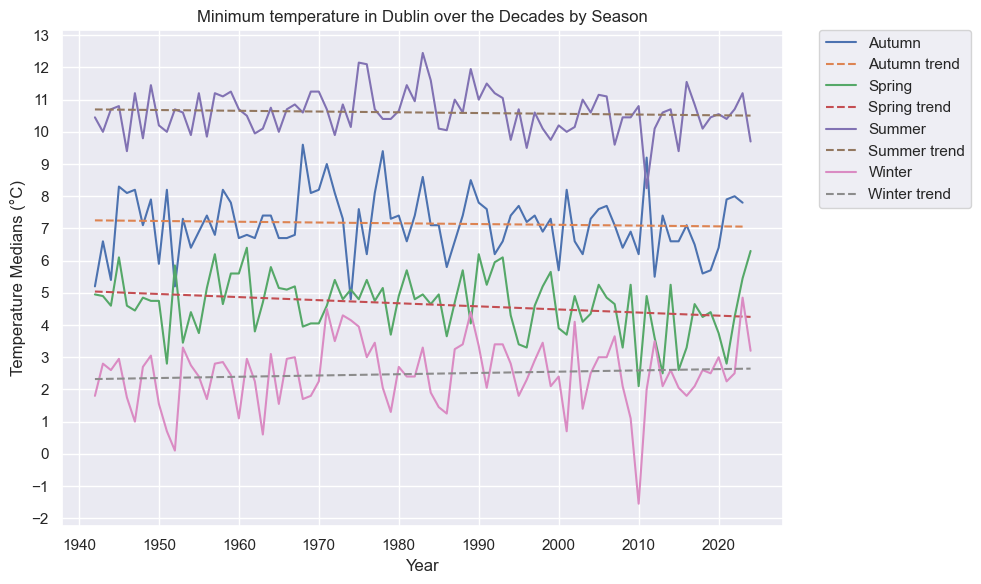

In [82]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for each season over the decades
plt.figure(figsize=(10, 6))
for season in seasonal_data_tp.index.get_level_values(1).unique():
    season_data = seasonal_data_tp.xs(season, level=1)
    plt.plot(season_data.index, season_data['mintp']['median'], label=season)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['mintp']['median'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend')

plt.xlabel('Year')
plt.ylabel('Temperature Medians (°C)')
plt.title('Minimum temperature in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

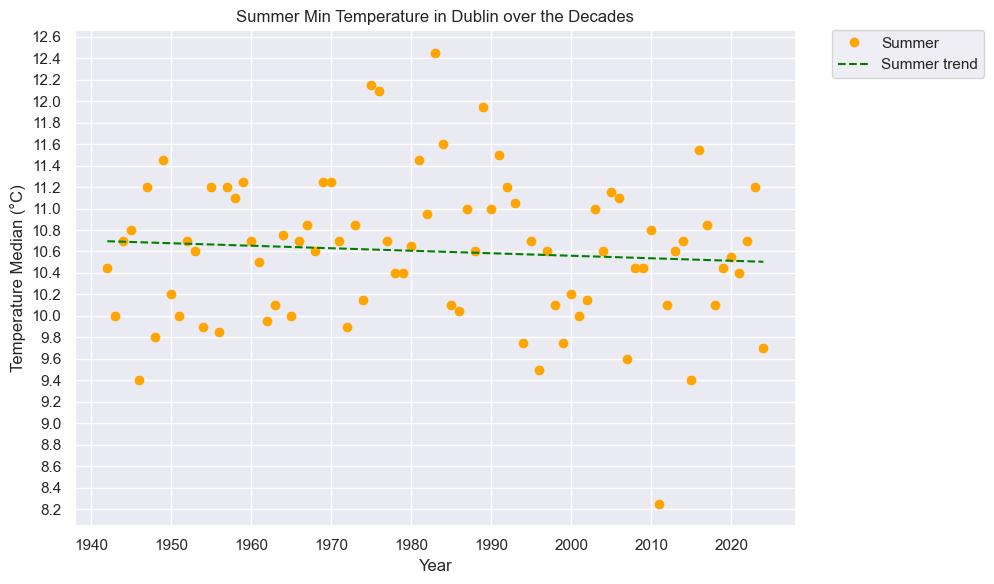

In [87]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for summer over the decades
summer_data = seasonal_data_tp.xs('Summer', level=1)
plt.figure(figsize=(10, 6))
plt.plot(summer_data.index, summer_data['mintp']['median'], 'o', label='Summer', color='orange')

# Fit a linear regression line
x = np.array(summer_data.index)
y = np.array(summer_data['mintp']['median'])
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, '--', label='Summer trend', color='green')

plt.xlabel('Year')
plt.ylabel('Temperature Median (°C)')
plt.title('Summer Min Temperature in Dublin over the Decades')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

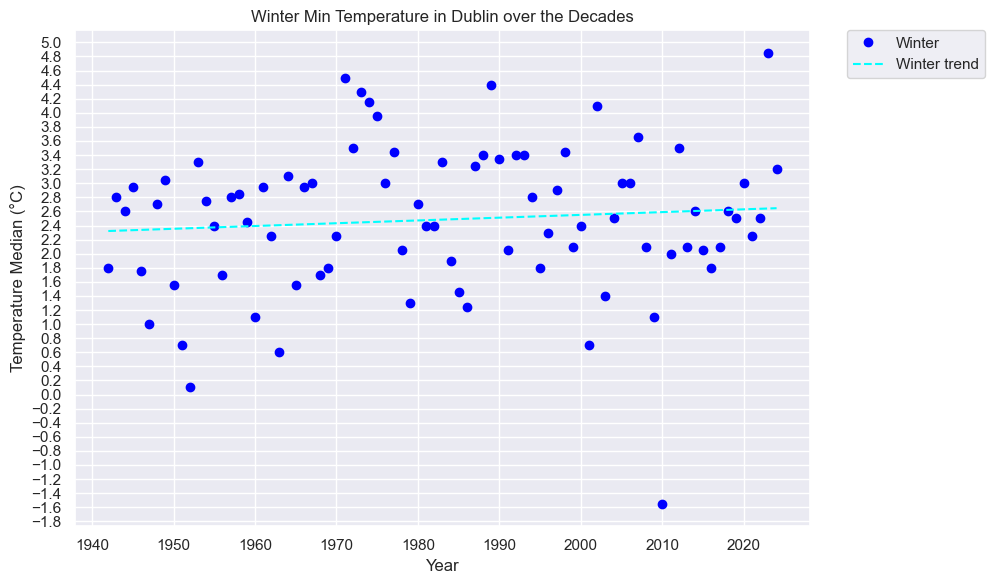

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for summer over the decades
summer_data = seasonal_data_tp.xs('Winter', level=1)
plt.figure(figsize=(10, 6))
plt.plot(summer_data.index, summer_data['mintp']['median'], 'o', label='Winter', color='blue')

# Fit a linear regression line
x = np.array(summer_data.index)
y = np.array(summer_data['mintp']['median'])
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, '--', label='Winter trend', color='cyan')

plt.xlabel('Year')
plt.ylabel('Temperature Median (°C)')
plt.title('Winter Min Temperature in Dublin over the Decades')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

Surprisingly all seasons except winter have been seeing their low temperatures decrease, while simultaneously seeing their highs increase! Winters are generally getting warmer in both ways (highs and lows). The apparent increase in winter extreme lows was an artifact caused by the winter of 2010, which was a massive outlier and it skewed the data a bit. The long term warming is apparent however. 

Given the noticeable divergence in temperature extremes during summer and spring, it likely indicates these seasons are becoming less cloudy and therefore drier. Conversely, winter, which is warming on both ends, appears to be getting cloudier and wetter, as increased cloud cover could explain this variability. To confirm this, we will examine precipitation trends next.

## Precipitation

In [141]:
#rain resampled over decades
resampled_rain_sun = dublin_daily.resample('10YE', on='date')[['rain', 'sun']].agg(['median', 'mean', 'min', 'max', 'sum', 'count']).round(2)

In [142]:
resampled_rain_sun

rain                                   sun                   \
           median  mean  min   max     sum count median  mean  min   max   
date                                                                       
1942-12-31    0.2  1.97  0.0  32.8   720.4   365    2.9  3.90  0.0  15.4   
1952-12-31    0.2  2.04  0.0  53.4  7463.0  3653    3.4  4.16  0.0  15.8   
1962-12-31    0.2  2.13  0.0  54.4  7787.6  3652    3.3  4.12  0.0  15.6   
1972-12-31    0.2  2.04  0.0  53.5  7448.2  3653    3.3  3.96  0.0  15.8   
1982-12-31    0.2  2.03  0.0  55.1  7424.2  3652    3.0  3.91  0.0  15.8   
1992-12-31    0.2  1.94  0.0  60.2  7078.4  3653    2.9  3.81  0.0  15.9   
2002-12-31    0.3  2.19  0.0  92.6  8000.5  3652    2.9  3.84  0.0  15.9   
2012-12-31    0.2  2.08  0.0  76.2  7593.1  3653    3.6  4.26  0.0  15.8   
2022-12-31    0.2  2.09  0.0  84.0  7628.3  3652    3.3  4.09  0.0  15.9   
2032-12-31    0.4  2.47  0.0  48.6  1427.3   578    3.2  3.96  0.0  15.5   

                           
                sum count  
date                       
1942-12-31   1424.9   365  
1952-12-31  15181.6  3653  
1962-12-31  15058.4  3652  
1972-12-31  14480.3  3653  
1982-12-31  14264.4  3652  
1992-12-31  13918.8  3653  
2002-12-31  14028.0  3652  
2012-12-31  15547.0  3653  
2022-12-31  14938.7  3652  
2032-12-31   2289.3   578

### Rain overview

In [14]:
#rain sunshine resampled over decades
grouped_daily_rain = dublin_daily.groupby(['year', 'month'])['rain'].agg(['median', 'mean', 'sum', 'min', 'max'])
grouped_daily_sun  = dublin_daily.groupby(['year', 'month'])['sun'].agg(['median', 'mean','sum', 'min', 'max', 'count'])

In [15]:
grouped_daily_rain.reset_index(inplace=True)

### Average daily rain over the decades

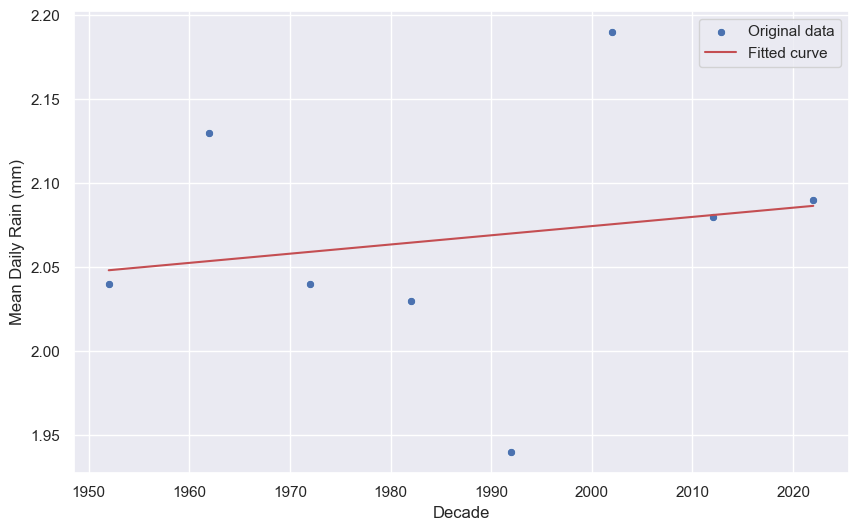

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Get the x and y values
x = np.array(range(1952,2032,10)) 
y = resampled_rain_sun['rain']['mean'].iloc[1:-1]

# Fit the curve
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

# Plot the data with the fitted curve
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Original data')
plt.plot(x, func(x, *popt), 'r-', label='Fitted curve')
plt.legend()
plt.xlabel('Decade')
plt.ylabel('Mean Daily Rain (mm)')
plt.show()

It appears from the data that there was an ever slightly increase in the amount of the average daily rain over the decades, which makes sense when considering that Ireland is an island surounded by the sea and a warm atmosphere is capable of holding more moisture. 

### Annual rain

In [132]:
#rain grouped by year
df = dublin_month.groupby('year')[['rain']].agg(['median', 'mean', 'min', 'max', 'sum'])
df.round(1)

rain                           
     median  mean   min    max     sum
year                                  
1941   54.4  54.4  41.7   67.2   108.9
1942   59.6  60.0   4.0  122.4   720.4
1943   51.6  55.7  20.3  107.2   668.9
1944   52.9  60.2  11.5  146.4   722.4
1945   46.5  49.3  14.7   86.5   591.4
...     ...   ...   ...    ...     ...
2020   65.2  62.4   9.3  130.4   748.6
2021   60.2  55.6  10.8  115.1   666.6
2022   45.8  57.3  14.4  127.9   687.6
2023   73.0  83.4  16.2  149.2  1001.2
2024   61.3  60.9  30.4  115.4   426.1

[84 rows x 5 columns]

In [133]:
#excluding 1942 and 2024 due to incomplete data
df = df.iloc[1:-1]


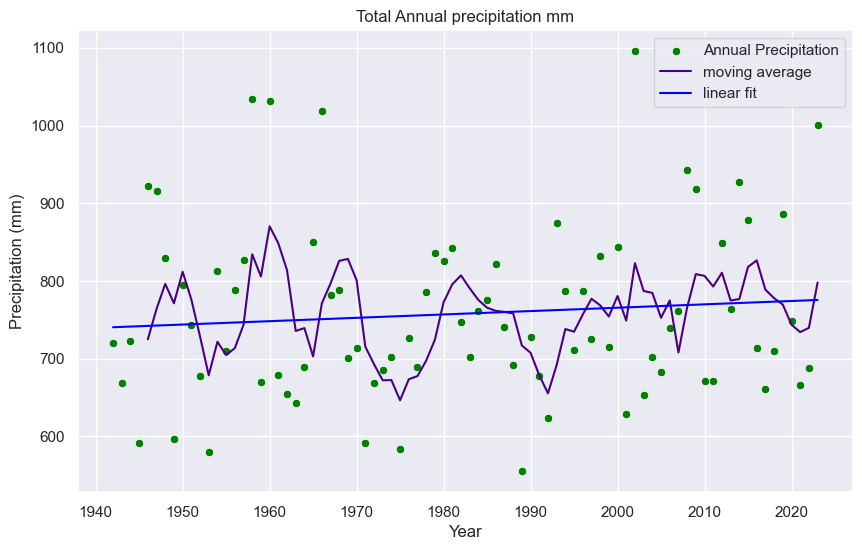

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get the x and y's values
x = df.index
z = df['rain']['sum']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d


# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, z)

y = func(x, *popt)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

total_rain_ma = z.rolling(window_size).mean()

#Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=z, label='Annual Precipitation', color='green')
sns.lineplot(x=x, y=total_rain_ma, label='moving average', color='indigo')
sns.lineplot(x=x, y=y, label='linear fit', color='blue')
plt.title('Total Annual precipitation mm')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

Looking at the total annual precipitation we can see a slightly increase over the years, which implies Dublin is getting wetter on the long term average. Let's explore how that affects the number of extreme rain days and, later on, the amount of sunshine hours.

### Extreme Precipitation

We can define very wet days as those recording more than 30mm:

In [101]:
extreme_rain = dublin_daily[dublin_daily['rain'] >= 30][['date', 'rain']]
non_extreme  = dublin_daily[dublin_daily['rain'] < 30 ][['date','rain']]


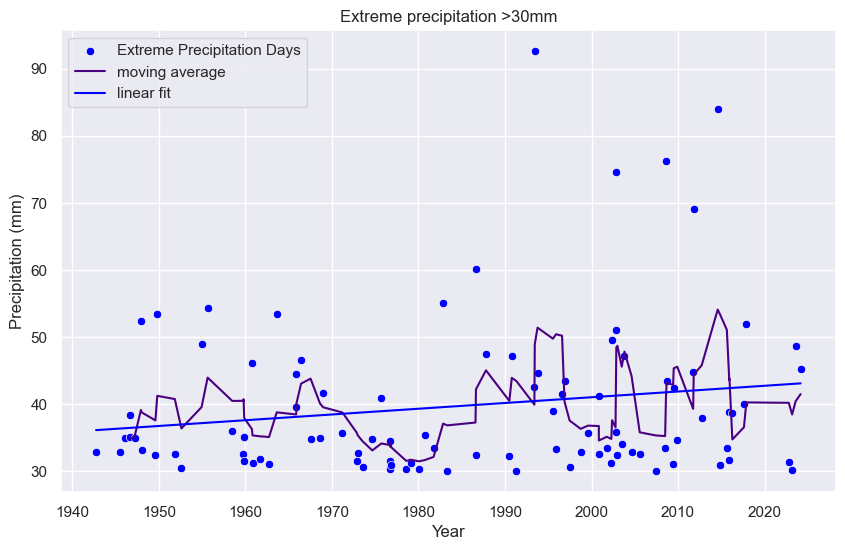

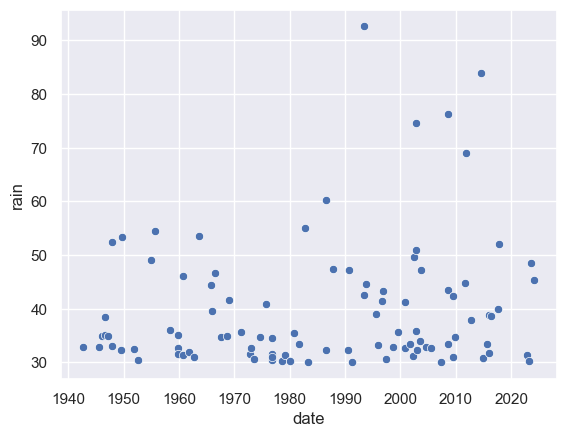

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates 
import pandas as pd 
import numpy as np

# Get the x and y's values
x = extreme_rain.index
z = extreme_rain['rain']

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Linear Fit the curve 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, z)

y = func(x, *popt)

#moving average
window_size = 5  # adjust this to change the moving average window size (number of years)

extreme_rain_ma = z.rolling(window_size).mean()

#Plot
x = extreme_rain['date']
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=z, label='Extreme Precipitation Days', color='blue')
sns.lineplot(x=x, y=extreme_rain_ma, label='moving average', color='indigo')
sns.lineplot(x=x, y=y, label='linear fit', color='blue')
plt.legend(loc='upper left')
plt.title('Extreme precipitation >30mm')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
# Create a date formatter
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()
sns.scatterplot(x=x, y=z)
plt.show()


As can be seen in the graph the number of extreme wet days has also steadly increased in the past few decades, which is consequence of a warmer atmosphere that is capable of retaining more moisture. 

### Precipitation by Season

In [111]:
#seasonal data excluding 1942 and 2024
df = seasonal_data_rain.iloc[4:-3]
df

median      mean   max  min    sum
year season                                    
1943 Autumn    0.30  2.013187  15.2  0.0  183.2
     Spring    0.10  1.546739  16.6  0.0  142.3
     Summer    0.20  1.915217  16.2  0.0  176.2
     Winter    0.30  1.857778  17.0  0.0  167.2
1944 Autumn    0.50  3.765934  24.9  0.0  342.7
...             ...       ...   ...  ...    ...
2022 Winter    0.30  1.965556  16.0  0.0  176.9
2023 Autumn    0.80  3.569231  29.8  0.0  324.8
     Spring    0.35  2.527174  30.2  0.0  232.5
     Summer    0.65  3.456522  48.6  0.0  318.0
     Winter    0.20  1.398889  15.6  0.0  125.9

[324 rows x 5 columns]

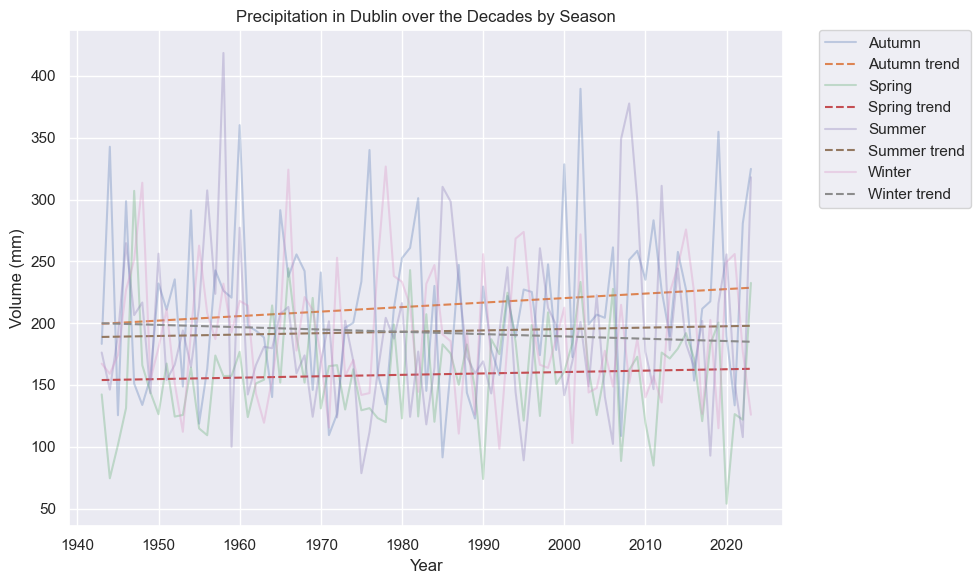

In [117]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for each season over the decades
plt.figure(figsize=(10, 6))
for season in df.index.get_level_values(1).unique():
    season_data = df.xs(season, level=1)
    plt.plot(season_data.index, season_data['sum'], label=season, alpha=0.3)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['sum'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend')

plt.xlabel('Year')
plt.ylabel('Volume (mm)')
plt.title('Precipitation in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

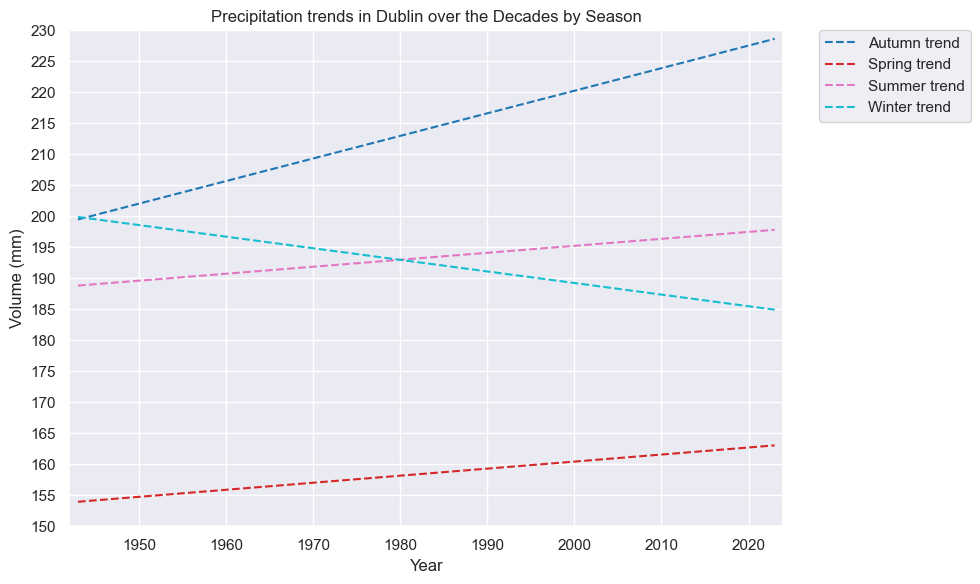

In [129]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Plot the median max temperature for each season over the decades
colors = cm.tab10(np.linspace(0, 1, len(df.index.get_level_values(1).unique())))

plt.figure(figsize=(10, 6))
for i, season in enumerate(df.index.get_level_values(1).unique()):
    season_data = df.xs(season, level=1)
    plt.plot(season_data.index, season_data['sum'], alpha=0)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['sum'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Volume (mm)')
plt.title('Precipitation trends in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.ylim(150, 230)
plt.xlim(1942, 2024)
plt.show()

Zooming in only on the trends we can infer that every season has seen an increase in the amount of rain over the decades except for winter, which has actually got slightly drier. Autumn saw a gain of nearly 30mm over the decades, while winter has seen a decrease of 15mm in the same time period. 

## Sunshine hours

### Overview

In [136]:
grouped_daily_sun

median      mean    sum  min   max  count    sum
year month                                                  
1942 1        1.60  2.348387   72.8  0.0   6.8     31   72.8
     2        0.50  1.835714   51.4  0.0   8.4     28   51.4
     3        0.60  2.383871   73.9  0.0  10.4     31   73.9
     4        6.75  6.180000  185.4  0.0  13.1     30  185.4
     5        6.30  6.319355  195.9  0.0  13.3     31  195.9
...            ...       ...    ...  ...   ...    ...    ...
2024 3        2.10  2.709677   84.0  0.0   9.2     31   84.0
     4        3.45  4.783333  143.5  0.0  13.5     30  143.5
     5        3.90  4.916129  152.4  0.0  12.5     31  152.4
     6        5.05  5.413333  162.4  0.1  14.7     30  162.4
     7        4.10  4.535484  140.6  0.0  15.3     31  140.6

[991 rows x 7 columns]

In [137]:
grouped_daily_sun.reset_index(inplace=True)

In [138]:
import dash
from dash import dash_table
import pandas as pd

# Create a Dash app

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = dash_table.DataTable(
    id='table',
    columns=[{'name': i, 'id': i} for i in grouped_daily_sun.columns],
    data=grouped_daily_sun.to_dict('records'),
    editable=True,
    filter_action='native',
    sort_action='native',
    sort_mode='multi',
    row_selectable='single',
    row_deletable=True,
    selected_rows=[],
    page_action='native',
    page_current=0,
    page_size=10, 
    style_table={'overflowY': 'scroll'}
)

# Run the app
app.run_server(mode='jupyterlab')

C:\Users\Marcos Neto\AppData\Local\Temp\ipykernel_11356\1134087401.py:13: UserWarning:

DataFrame columns are not unique, some columns will be omitted.



In [143]:
resampled_rain_sun['sun']

,median,mean,min,max,sum,count
date,,,,,,
1942-12-31,2.9,3.90,0.0,15.4,1424.9,365
1952-12-31,3.4,4.16,0.0,15.8,15181.6,3653
1962-12-31,3.3,4.12,0.0,15.6,15058.4,3652
1972-12-31,3.3,3.96,0.0,15.8,14480.3,3653
1982-12-31,3.0,3.91,0.0,15.8,14264.4,3652
1992-12-31,2.9,3.81,0.0,15.9,13918.8,3653
2002-12-31,2.9,3.84,0.0,15.9,14028.0,3652
2012-12-31,3.6,4.26,0.0,15.8,15547.0,3653
2022-12-31,3.3,4.09,0.0,15.9,14938.7,3652


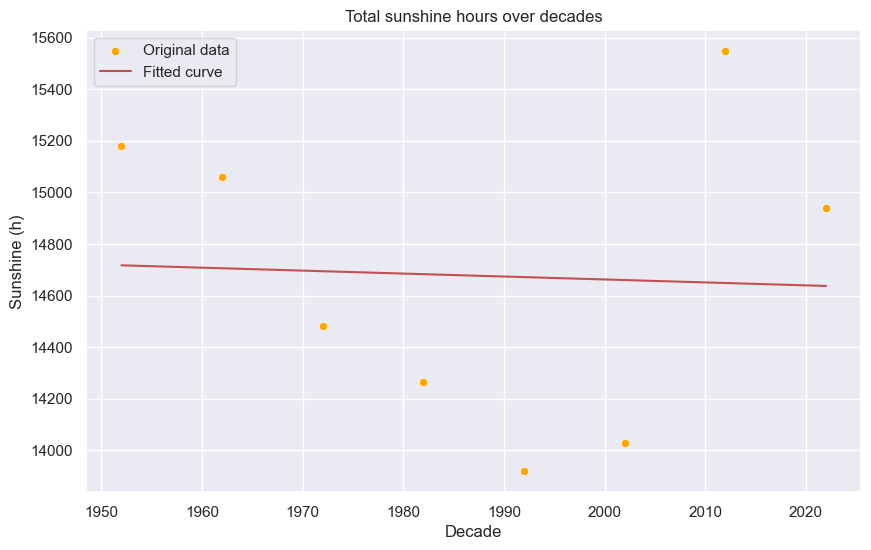

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Get the x and y values
x = np.array(range(1952,2032,10)) 
y = resampled_rain_sun['sun']['sum'].iloc[1:-1]

# Fit the curve
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

# Plot the data with the fitted curve
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Original data', color='orange')
plt.plot(x, func(x, *popt), 'r-', label='Fitted curve')
plt.title('Total sunshine hours over decades')
plt.legend()
plt.xlabel('Decade')
plt.ylabel('Sunshine (h)')
plt.show()

In [144]:
#sunshine grouped by year
df = dublin_month.groupby('year')[['sun']].agg(['median', 'mean', 'min', 'max', 'sum'])
df.round(1)

sun                            
     median   mean   min    max     sum
year                                   
1941   51.1   51.1  46.1   56.1   102.2
1942  107.3  118.7  38.8  224.8  1424.9
1943  126.7  133.1  48.7  238.6  1597.5
1944  123.0  120.6  54.9  190.3  1447.8
1945  115.2  123.3  51.1  202.5  1479.9
...     ...    ...   ...    ...     ...
2020  112.4  126.9  65.0  295.0  1523.1
2021  113.6  124.6  54.1  214.2  1494.6
2022  123.6  133.7  72.6  222.0  1604.1
2023  110.2  122.0  54.9  226.7  1464.4
2024  140.6  117.8  63.3  162.4   824.9

[84 rows x 5 columns]

In [145]:
#excluding 1942 and 2024 due to incomplete data
df = df.iloc[1:-1]

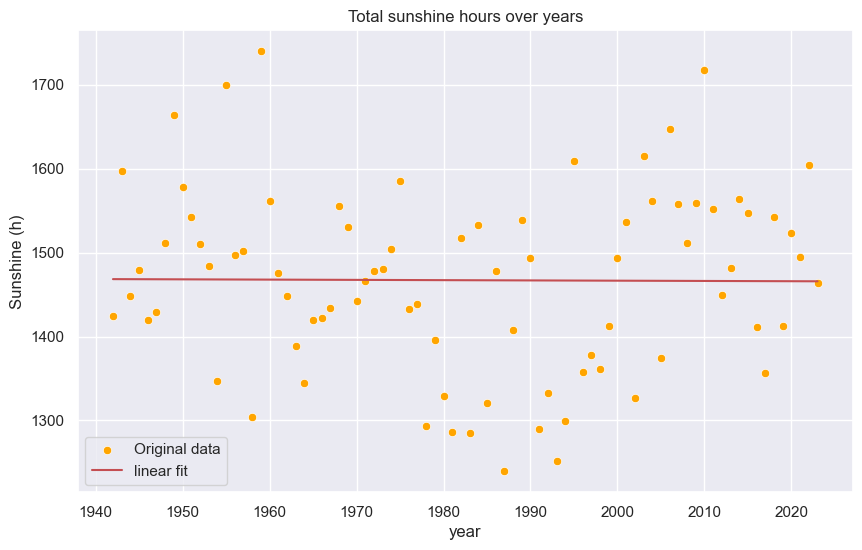

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the function to fit (e.g. a linear function, a quadratic function, etc.)
def func(x, c, d):
    return c * x + d

# Get the x and y values
x = df.index
y = df['sun']['sum']

# Fit the curve
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x, y)

# Plot the data with the fitted curve
sns.set()
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label='Original data', color='orange')
plt.plot(x, func(x, *popt), 'r-', label='linear fit')
plt.title('Total sunshine hours over years')
plt.legend()
plt.xlabel('year')
plt.ylabel('Sunshine (h)')
plt.show()

From the data we see on a yearly basis, Dublin sunshine hours are highly variable and unpredictable. The long term trend has not changed significantly however. Let's now break it down by season.

### Seasonal sunshine

In [150]:
df = seasonal_data_sun
df

median      mean   max  min    sum
year season                                    
1942 Autumn    2.50  3.137363  11.0  0.0  285.5
     Spring    4.00  4.947826  13.3  0.0  455.2
     Summer    5.10  5.665217  15.4  0.0  521.2
     Winter    0.60  1.811111   8.4  0.0  163.0
1943 Autumn    3.10  3.363736  11.9  0.0  306.1
...             ...       ...   ...  ...    ...
2023 Summer    4.40  5.235870  15.5  0.0  481.7
     Winter    1.55  2.385556   7.8  0.0  214.7
2024 Spring    3.05  4.129348  13.5  0.0  379.9
     Summer    4.40  4.967213  15.3  0.0  303.0
     Winter    0.95  2.366667   9.1  0.0  142.0

[331 rows x 5 columns]

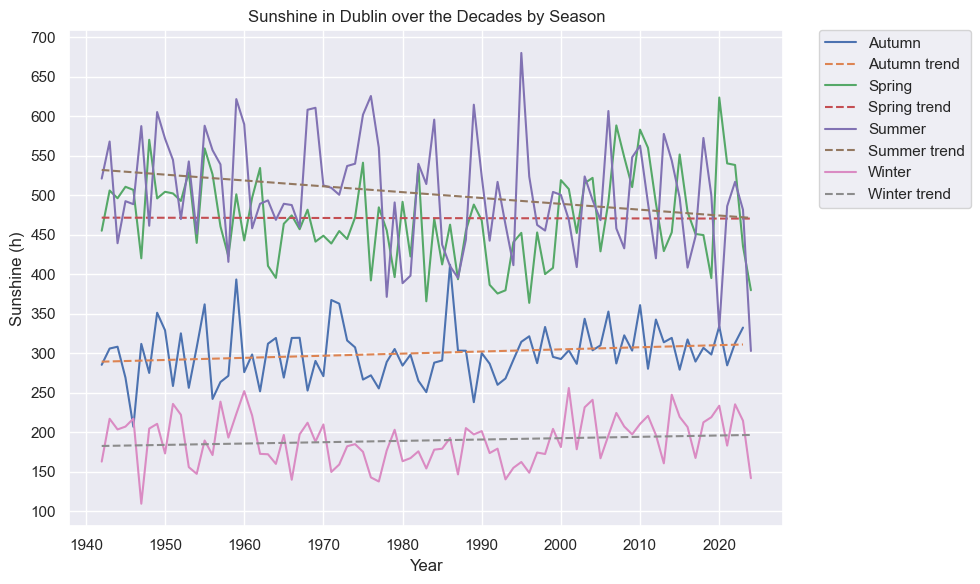

In [153]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for each season over the decades
plt.figure(figsize=(10, 6))
for season in df.index.get_level_values(1).unique():
    season_data = df.xs(season, level=1)
    plt.plot(season_data.index, season_data['sum'], label=season, alpha=1)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['sum'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend')

plt.xlabel('Year')
plt.ylabel('Sunshine (h)')
plt.title('Sunshine in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

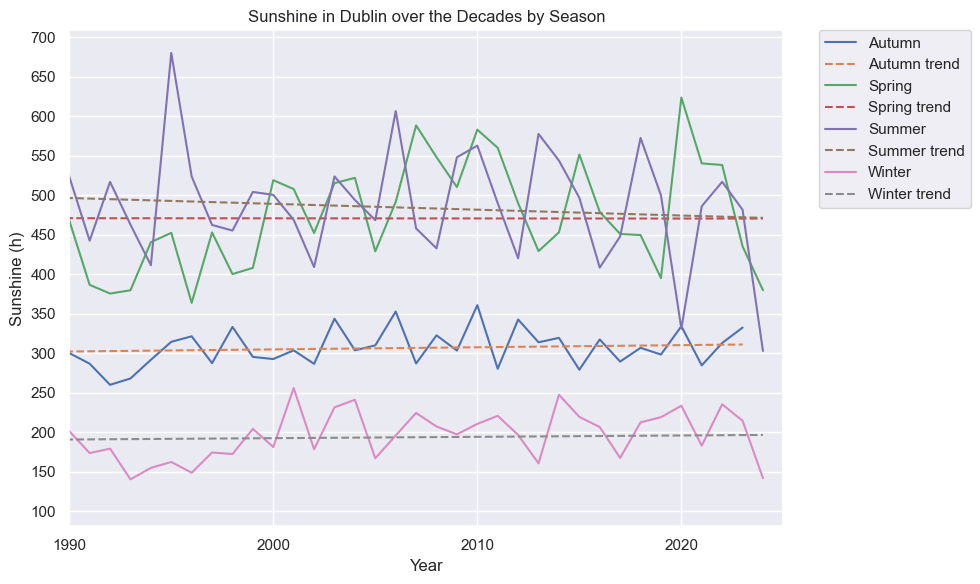

In [154]:
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Plot the median max temperature for each season over the decades
plt.figure(figsize=(10, 6))
for season in df.index.get_level_values(1).unique():
    season_data = df.xs(season, level=1)
    plt.plot(season_data.index, season_data['sum'], label=season, alpha=1)

    # Fit a linear regression line
    x = np.array(season_data.index)
    y = np.array(season_data['sum'])
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, '--', label=f'{season} trend')

plt.xlabel('Year')
plt.ylabel('Sunshine (h)')
plt.title('Sunshine in Dublin over the Decades by Season')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlim(1990, 2025)
plt.show()

When examining seasonal trends, summers have notably become duller over the decades. The slight increase in precipitation has been accompanied by much cloudier days. Now, summer alternates with spring as the sunniest season. Summers have lost, on average, almost 50h of sunshine compared to the 1940s. 

Interestingly, autumn, despite experiencing the highest increase in precipitation, has remained mostly constant, with only a minor, almost imperceptible upward trend in sunshine hours. Spring has remained virtually unchanged. 